<a href="https://colab.research.google.com/github/lihui1625/machineLearning/blob/main/SK_02_05_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 28.1 MB/s eta 0:00:00


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=5)

forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=5)

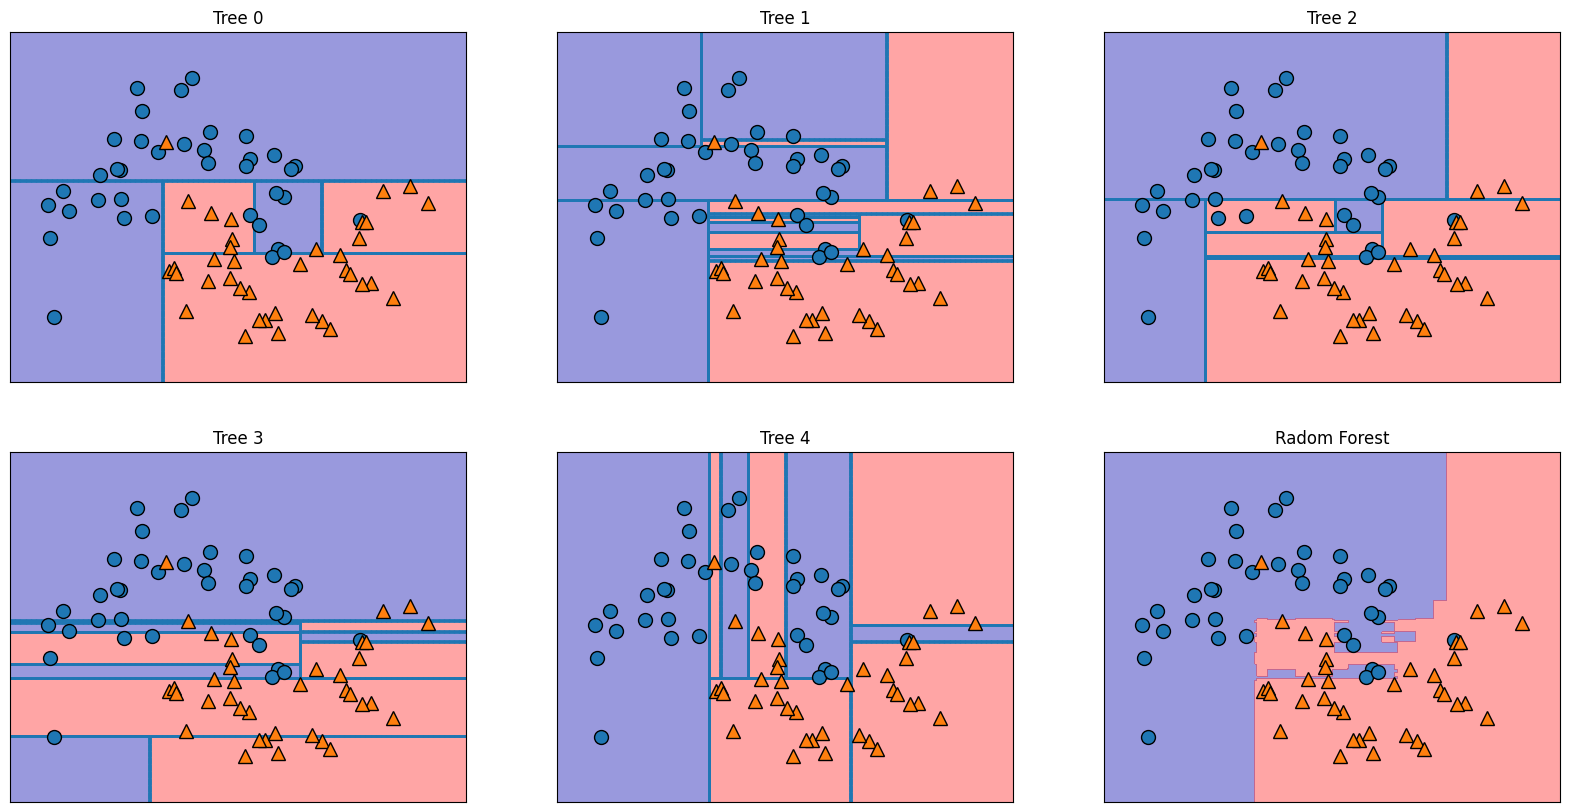

In [8]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train, fill=True, ax=axes[-1,-1],alpha=.4 )
axes[-1,-1].set_title("Radom Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
print("train score: ", forest.score(X_train, y_train))
print("test score: ", forest.score(X_test, y_test))

train score:  0.9976525821596244
test score:  0.9440559440559441


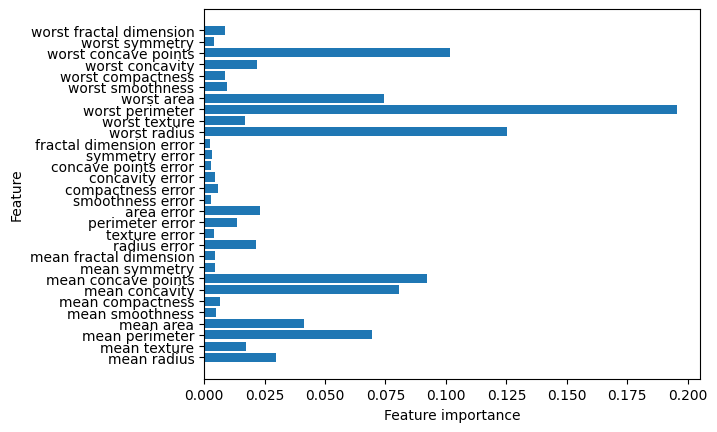

In [11]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align="center")
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(forest)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("train score: ", gbrt.score(X_train, y_train))
print("test score: ", gbrt.score(X_test, y_test))

train score:  1.0
test score:  0.958041958041958


In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("train score: ", gbrt.score(X_train, y_train))
print("test score: ", gbrt.score(X_test, y_test))

train score:  0.9953051643192489
test score:  0.965034965034965


In [14]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("train score: ", gbrt.score(X_train, y_train))
print("test score: ", gbrt.score(X_test, y_test))

train score:  0.9953051643192489
test score:  0.9440559440559441


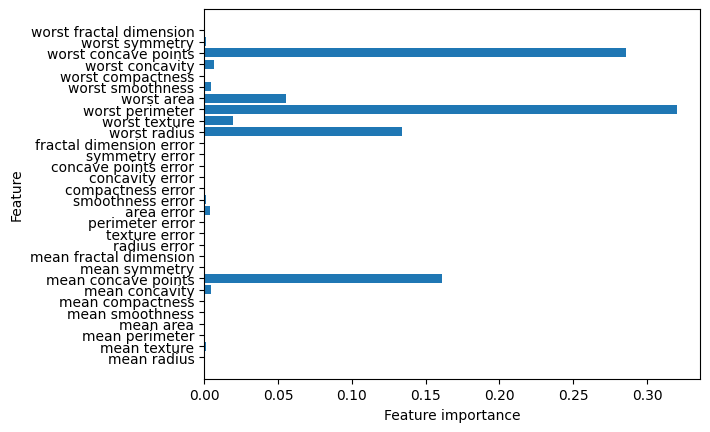

In [17]:
plot_feature_importances_cancer(gbrt)